## Preparing the data 

In [201]:
import string
import pandas as pd
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [16]:
merged_df = pd.read_csv("merged_df.csv")
features_df = pd.read_csv("script_text_features.csv")

In [17]:
df = pd.merge(merged_df, features_df, how='left', on='movie_name')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 927
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0_x           928 non-null    int64  
 1   script_x               911 non-null    object 
 2   movie_name             928 non-null    object 
 3   genre_x                928 non-null    object 
 4   year                   928 non-null    int64  
 5   belongs_to_collection  919 non-null    float64
 6   genres                 919 non-null    object 
 7   release_date           919 non-null    object 
 8   runtime                919 non-null    float64
 9   spoken_languages       919 non-null    object 
 10  success_score          928 non-null    float64
 11  Unnamed: 0_y           925 non-null    float64
 12  script_y               925 non-null    object 
 13  genre_y                925 non-null    object 
 14  features               925 non-null    object 
dtypes: flo

In [19]:
df['features']

0      [1659, 32.20187583742742, 40.55381866904868, 7...
1      [1357, 29.712419942232827, 46.9044330026372, 7...
2      [1569, 32.465261801785225, 41.354559676083554,...
3      [3652, 28.101432403705015, 44.60191324593815, ...
4      [672, 27.95964790821877, 41.529027791514196, 1...
                             ...                        
923    [2380, 29.69930380684343, 41.13464671900459, 8...
924    [1520, 32.17267720731924, 36.56066796944395, 7...
925    [2347, 28.972149869765577, 46.58385093167702, ...
926    [1786, 32.85564487941279, 38.091576371897936, ...
927    [1217, 29.382990550305724, 37.92106725958866, ...
Name: features, Length: 928, dtype: object

In [20]:
df['features'] = df['features'].apply(lambda x: [float(i) for i in str(x).replace('[', '').replace(']', '').split(',')])

In [21]:
split_df = pd.DataFrame(df['features'].tolist(), columns=['prop_count', 'verb_percent', 'noun_percent',
                                                          'adj_percent', 'adv_percent', 'prop_nunique',
                                                          'verb_unique_percent', 'noun_unique_percent',
                                                          'adj_unique_percent', 'adv_unique_percent'])

In [22]:
split_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prop_count           925 non-null    float64
 1   verb_percent         925 non-null    float64
 2   noun_percent         925 non-null    float64
 3   adj_percent          925 non-null    float64
 4   adv_percent          925 non-null    float64
 5   prop_nunique         925 non-null    float64
 6   verb_unique_percent  925 non-null    float64
 7   noun_unique_percent  925 non-null    float64
 8   adj_unique_percent   925 non-null    float64
 9   adv_unique_percent   925 non-null    float64
dtypes: float64(10)
memory usage: 72.6 KB


,prop_count,verb_percent,noun_percent,adj_percent,adv_percent,prop_nunique,verb_unique_percent,noun_unique_percent,adj_unique_percent,adv_unique_percent
0,1659,32.20187583742742,40.55381866904868,7.23537293434569,11.23715944618133,499,35.584064821066846,64.21336934503714,15.800135043889265,7.359891964888589
1,1357,29.712419942232827,46.9044330026372,7.2585708903679516,8.9539118422705,503,30.923344947735192,68.59756097560975,13.850174216027874,5.966898954703833
2,1569,32.465261801785225,41.354559676083554,7.398546056869421,10.51808226741511,392,39.29631199660873,66.29927935565918,14.66723187791437,7.71513353115727
3,3652,28.101432403705015,44.60191324593815,7.318924937996659,10.021764437920737,936,34.63470319634703,67.00913242009132,15.547945205479452,7.648401826484018
4,672,27.95964790821877,41.529027791514196,10.147364256750075,11.225398081297596,362,36.33613445378151,62.45378151260504,17.88235294117647,7.932773109243698
...,...,...,...,...,...,...,...,...,...,...
923,2380,29.69930380684343,41.13464671900459,8.021033920900607,11.050214782995111,735,30.758807588075882,68.4959349593496,15.24390243902439,7.6897018970189706
924,1520,32.17267720731924,36.56066796944395,7.452478237697637,13.839047788239474,370,33.36392840752639,62.2303809086737,17.117944011014227,9.45387792565397
925,2347,28.972149869765577,46.58385093167702,7.640419421625593,9.49041608228144,614,34.20849420849421,67.28442728442728,16.216216216216218,6.76962676962677
926,1786,32.85564487941279,38.091576371897936,7.340090877315624,10.989164627752533,549,33.11304347826087,67.40869565217392,15.2,7.234782608695652


In [23]:
df = df.drop('features', axis=1)
df = pd.concat([df, split_df], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 927
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_name             925 non-null    object 
 1   genre_x                925 non-null    object 
 2   year                   925 non-null    int64  
 3   belongs_to_collection  925 non-null    float64
 4   genres                 916 non-null    object 
 5   spoken_languages       925 non-null    object 
 6   success_score          925 non-null    float64
 7   script                 925 non-null    object 
 8   genre_y                925 non-null    object 
 9   prop_count             925 non-null    float64
 10  verb_percent           925 non-null    float64
 11  noun_percent           925 non-null    float64
 12  adj_percent            925 non-null    float64
 13  adv_percent            925 non-null    float64
 14  prop_nunique           925 non-null    float64
 15  verb_u

In [28]:
df = df.drop('script_x', axis=1)


In [30]:
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1)

In [32]:
df = df.rename(columns={'script_y': 'script'})

In [38]:
df = df[~df['script'].isnull()]

In [40]:
df = df.drop(['runtime','release_date'], axis=1)

In [41]:
df['belongs_to_collection'] = df['belongs_to_collection'].fillna(0)

In [43]:
df['spoken_languages']

0              ['Français', 'English']
1             ['', 'Pусский', 'Český']
2                          ['English']
3                                  NaN
4                          ['English']
                    ...               
923    ['한국어/조선말', 'English', 'Eesti']
924                        ['English']
925            ['Français', 'English']
926                        ['English']
927                        ['English']
Name: spoken_languages, Length: 925, dtype: object

In [44]:
df['spoken_languages'] = df['spoken_languages'].fillna('English').astype(object)

In [50]:
df['genre']

0             ['comedy', 'romance']['comedy', 'romance']
1                                   ['comedy']['comedy']
2                                     ['drama']['drama']
3      ['drama', 'thriller', 'science-fiction']['dram...
4      ['drama', 'adventure', 'thriller']['adventure'...
                             ...                        
923           ['comedy', 'romance']['comedy', 'romance']
924                                   ['drama']['drama']
925    ['romance', 'drama', 'comedy']['comedy', 'dram...
926           ['romance', 'comedy']['comedy', 'romance']
927           ['romance', 'comedy']['comedy', 'romance']
Name: genre, Length: 925, dtype: object

In [ ]:
df['genre_x'] = df['genre_x'].apply(lambda x: x.replace('[', '').replace(']', '').split(','))
df['genre_y'] = df['genre_y'].apply(lambda x: x.replace('[', '').replace(']', '').split(','))

In [53]:

df['genre'] = df.apply(lambda x: list(set(x['genre_x'] + x['genre_y'])), axis=1)

In [54]:
df['genre']

0                                 [ 'romance', 'comedy']
1                                             ['comedy']
2                                              ['drama']
3             [ 'thriller',  'science-fiction', 'drama']
4      [ 'drama',  'adventure',  'thriller', 'adventu...
                             ...                        
923                               [ 'romance', 'comedy']
924                                            ['drama']
925    ['romance',  'drama',  'comedy', 'comedy',  'r...
926         ['romance',  'romance', 'comedy',  'comedy']
927         ['romance',  'romance', 'comedy',  'comedy']
Name: genre, Length: 925, dtype: object

In [59]:
df = df.drop(['genre_x','genres','genre_y'], axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 927
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_name             925 non-null    object 
 1   year                   925 non-null    int64  
 2   belongs_to_collection  925 non-null    float64
 3   spoken_languages       925 non-null    object 
 4   success_score          925 non-null    float64
 5   script                 925 non-null    object 
 6   prop_count             925 non-null    float64
 7   verb_percent           925 non-null    float64
 8   noun_percent           925 non-null    float64
 9   adj_percent            925 non-null    float64
 10  adv_percent            925 non-null    float64
 11  prop_nunique           925 non-null    float64
 12  verb_unique_percent    925 non-null    float64
 13  noun_unique_percent    925 non-null    float64
 14  adj_unique_percent     925 non-null    float64
 15  adv_un

In [182]:
# removing all columns that we aren't using as features for modeling
df_clean = df.copy().drop(['movie_name','script'], axis=1)

In [183]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 927
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   925 non-null    int64  
 1   belongs_to_collection  925 non-null    float64
 2   spoken_languages       925 non-null    object 
 3   success_score          925 non-null    float64
 4   prop_count             925 non-null    float64
 5   verb_percent           925 non-null    float64
 6   noun_percent           925 non-null    float64
 7   adj_percent            925 non-null    float64
 8   adv_percent            925 non-null    float64
 9   prop_nunique           925 non-null    float64
 10  verb_unique_percent    925 non-null    float64
 11  noun_unique_percent    925 non-null    float64
 12  adj_unique_percent     925 non-null    float64
 13  adv_unique_percent     925 non-null    float64
 14  genre                  925 non-null    object 
dtypes: flo

In [184]:
df_clean['spoken_languages'] = df_clean['spoken_languages'].apply(lambda x: x.replace(' ','')
                                                                  .replace("'","").replace('[', '')
                                                                  .replace(']', '')
                                                                  .split(','))
df_clean = df_clean.reset_index()

In [185]:
df_clean

,index,year,belongs_to_collection,spoken_languages,success_score,prop_count,verb_percent,noun_percent,adj_percent,adv_percent,prop_nunique,verb_unique_percent,noun_unique_percent,adj_unique_percent,adv_unique_percent,genre
0,0,1999,0.0,"[Français, English]",45.618088,1659.0,32.201876,40.553819,7.235373,11.237159,499.0,35.584065,64.213369,15.800135,7.359892,"[ 'romance', 'comedy']"
1,1,2009,0.0,"[, Pусский, Český]",13.206581,1357.0,29.712420,46.904433,7.258571,8.953912,503.0,30.923345,68.597561,13.850174,5.966899,['comedy']
2,2,2006,0.0,[English],44.809115,1569.0,32.465262,41.354560,7.398546,10.518082,392.0,39.296312,66.299279,14.667232,7.715134,['drama']
3,3,1995,0.0,[English],58.896398,3652.0,28.101432,44.601913,7.318925,10.021764,936.0,34.634703,67.009132,15.547945,7.648402,"[ 'thriller', 'science-fiction', 'drama']"
4,4,2010,0.0,[English],51.367230,672.0,27.959648,41.529028,10.147364,11.225398,362.0,36.336134,62.453782,17.882353,7.932773,"[ 'drama', 'adventure', 'thriller', 'adventu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,923,2008,0.0,"[한국어/조선말, English, Eesti]",42.505931,2380.0,29.699304,41.134647,8.021034,11.050215,735.0,30.758808,68.495935,15.243902,7.689702,"[ 'romance', 'comedy']"
921,924,2000,0.0,[English],51.612581,1520.0,32.172677,36.560668,7.452478,13.839048,370.0,33.363928,62.230381,17.117944,9.453878,['drama']
922,925,2010,0.0,"[Français, English]",36.872878,2347.0,28.972150,46.583851,7.640419,9.490416,614.0,34.208494,67.284427,16.216216,6.769627,"['romance', 'drama', 'comedy', 'comedy', 'r..."
923,926,1998,0.0,[English],62.394848,1786.0,32.855645,38.091576,7.340091,10.989165,549.0,33.113043,67.408696,15.200000,7.234783,"['romance', 'romance', 'comedy', 'comedy']"


In [186]:
# ONE HOT ENCODER FOR spoken_languages!


langs = list(set(list(df_clean['spoken_languages'].explode().values)))

langs

def encode_language(x, langs):
    lang_count = len(langs)
    vec = [0]*lang_count
    spkn_lng = x['spoken_languages']
    for i in range(lang_count):
        if langs[i] in spkn_lng:
            vec[i] = 1
#     print(spkn_lng, vec)
    return vec

langs_df = pd.DataFrame(df_clean.apply(lambda x: encode_language(x, langs), axis=1).to_list(), columns=langs).reset_index()
langs_df

,index,,Eesti,shqip,اردو,Český,Norsk,TiếngViệt,българскиезик,Polski,...,Pусский,svenska,Malti,فارسی,한국어/조선말,ภาษาไทย,العربية,English,日本語,广州话/廣州話
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,920,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
921,921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
922,922,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
923,923,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [187]:
df_clean = pd.concat([df_clean, langs_df], axis=1)

In [188]:
df_clean.shape

(925, 57)

In [189]:
# converting genres column to list of strings

df_clean['genre'] = df_clean['genre'].apply(lambda x: list(set(str(x).replace(' ','')
                                                                  .replace("'","")
                                                                  .replace('"','')
                                                                  .replace('[', '')
                                                                  .replace(']', '')
                                                                  .split(','))))


In [190]:
# ONE HOT ENCODER FOR spoken_languages!


genres = list(set(list(df_clean['genre'].explode().values)))

genres

def encode_genre(x, genres):
    genre_count = len(genres)
    vec = [0]*genre_count
    gen = x['genre']
    for i in range(genre_count):
        if genres[i] in gen:
            vec[i] = 1
#     print(spkn_lng, vec)
    return vec

genre_df = pd.DataFrame(df_clean.apply(lambda x: encode_genre(x, genres), axis=1).to_list(), columns=genres).reset_index()
genre_df

,index,romance,comedy,science-fiction,fantasy,horror,thriller,musical,war,animation,adventure,western,crime,mystery,drama,action,family
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,920,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
921,921,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
922,922,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
923,923,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
df_clean = pd.concat([df_clean, genre_df], axis=1)
df_clean.shape

(925, 74)

In [193]:
df_clean = df_clean.drop(['genre', 'spoken_languages'], axis=1)

In [194]:
df_clean

,index,year,belongs_to_collection,success_score,prop_count,verb_percent,noun_percent,adj_percent,adv_percent,prop_nunique,...,musical,war,animation,adventure,western,crime,mystery,drama,action,family
0,0,1999,0.0,45.618088,1659.0,32.201876,40.553819,7.235373,11.237159,499.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2009,0.0,13.206581,1357.0,29.712420,46.904433,7.258571,8.953912,503.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2006,0.0,44.809115,1569.0,32.465262,41.354560,7.398546,10.518082,392.0,...,0,0,0,0,0,0,0,1,0,0
3,3,1995,0.0,58.896398,3652.0,28.101432,44.601913,7.318925,10.021764,936.0,...,0,0,0,0,0,0,0,1,0,0
4,4,2010,0.0,51.367230,672.0,27.959648,41.529028,10.147364,11.225398,362.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,923,2008,0.0,42.505931,2380.0,29.699304,41.134647,8.021034,11.050215,735.0,...,0,0,0,0,0,0,0,0,0,0
921,924,2000,0.0,51.612581,1520.0,32.172677,36.560668,7.452478,13.839048,370.0,...,0,0,0,0,0,0,0,1,0,0
922,925,2010,0.0,36.872878,2347.0,28.972150,46.583851,7.640419,9.490416,614.0,...,0,0,0,0,0,0,0,1,0,0
923,926,1998,0.0,62.394848,1786.0,32.855645,38.091576,7.340091,10.989165,549.0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  925 non-null    int64  
 1   year                   925 non-null    int64  
 2   belongs_to_collection  925 non-null    float64
 3   success_score          925 non-null    float64
 4   prop_count             925 non-null    float64
 5   verb_percent           925 non-null    float64
 6   noun_percent           925 non-null    float64
 7   adj_percent            925 non-null    float64
 8   adv_percent            925 non-null    float64
 9   prop_nunique           925 non-null    float64
 10  verb_unique_percent    925 non-null    float64
 11  noun_unique_percent    925 non-null    float64
 12  adj_unique_percent     925 non-null    float64
 13  adv_unique_percent     925 non-null    float64
 14  index                  925 non-null    int64  
 15        

As a final step, let's define a threshold for whether a movie is a success or not. If the success score of the movie is above 55, lets term it as a success. This will be a boolean value for the success of the movie based on script parameters. 

In [437]:
df_clean['is_success'] = np.where(df_clean['success_score']>55,1,0)
df_clean = df_clean.drop(['index',''], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   925 non-null    int64  
 1   belongs_to_collection  925 non-null    float64
 2   success_score          925 non-null    float64
 3   prop_count             925 non-null    float64
 4   verb_percent           925 non-null    float64
 5   noun_percent           925 non-null    float64
 6   adj_percent            925 non-null    float64
 7   adv_percent            925 non-null    float64
 8   prop_nunique           925 non-null    float64
 9   verb_unique_percent    925 non-null    float64
 10  noun_unique_percent    925 non-null    float64
 11  adj_unique_percent     925 non-null    float64
 12  adv_unique_percent     925 non-null    float64
 13  Eesti                  925 non-null    int64  
 14  shqip                  925 non-null    int64  
 15  اردو  

Now we have a dataframe with just numerical values, we are ready to do some modeling.

### Logistic Regression

C:\Users\Virajk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Virajk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Virajk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Virajk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Virajk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Virajk\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47568 missing 

<AxesSubplot:>

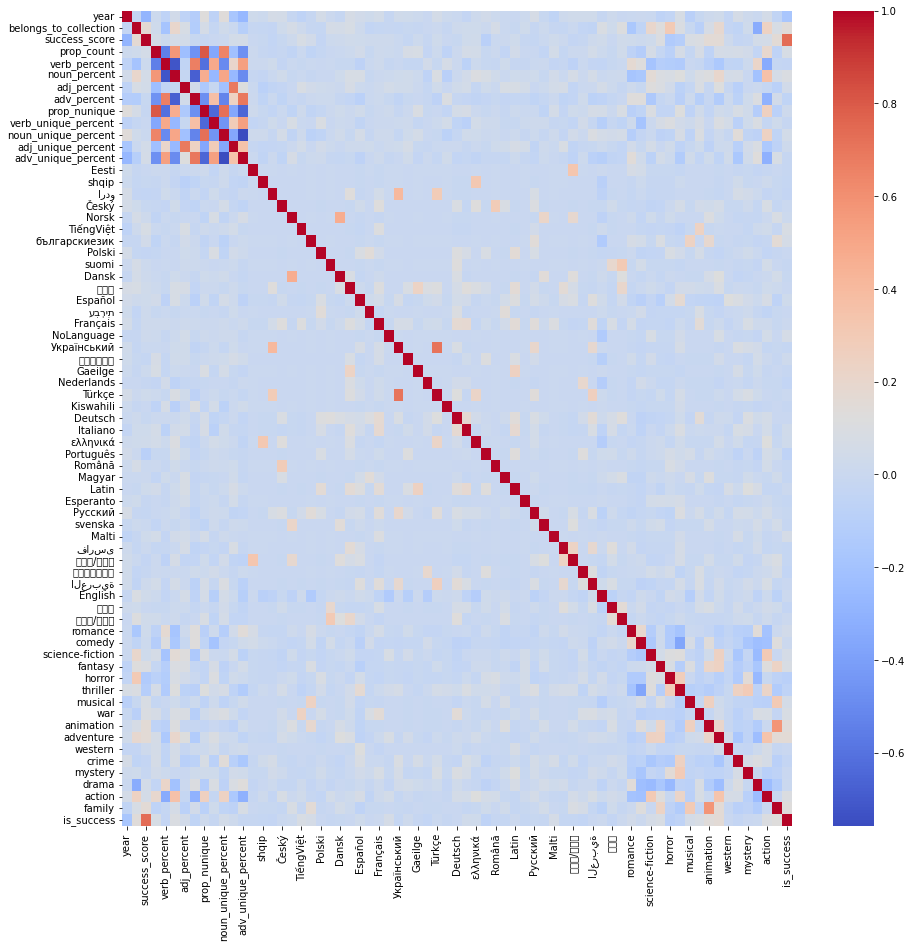

In [438]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.corr(), annot=False, cmap='coolwarm')

In [439]:
# IFS
# 0. pull the data and ADD CONSTANT

X = df_clean.drop(['success_score','is_success'], axis=1)
y = df_clean['is_success']

In [448]:
# Taking a chuck for our 25% test set
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.10,
                     random_state=1)

In [449]:
# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_remainder, y_remainder, test_size = 0.10,
                     random_state=1)

In [450]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (93, 67)
Shape of validation set: (84, 67)
Shape of train set: (748, 67)


In [467]:
validation_scores = []
train_scores = []

#A high value of C tells the model to give a high weight to the training data, 
# it also gives a lower weight to the complexity penalty. 
C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1,max_iter=100000)
    my_logreg.fit(X_train,y_train)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train,y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation,y_validation))

In [468]:
#Trick to calculate the ideal c value: 

# index the value that is largest in the test accuracy
index_of_max = np.argmax(validation_scores)

# the corresponding best c value
best_c = C_range[index_of_max]

best_c

1.0

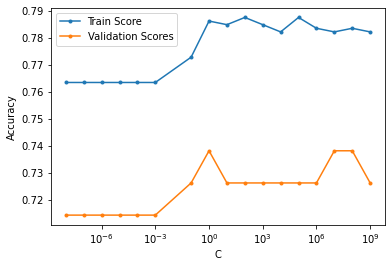

In [469]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [473]:
my_logreg = LogisticRegression(C = 1,random_state=1,max_iter=10000)
my_logreg.fit(X_train,y_train)

print(my_logreg.coef_)
print(X_train.columns)

[[-9.02603136e-03  9.05998330e-01  3.49773415e-04  1.62954324e-01
   4.28387266e-02  2.20725440e-01 -4.15176720e-02 -1.16457515e-03
  -4.59673645e-02  1.29147841e-01 -1.96989281e-02  1.31718315e-01
  -6.43523030e-02 -7.37858824e-02 -7.34154351e-02 -8.65185814e-02
   1.87055135e-01  5.94115714e-01  2.08306923e-01  2.51799108e-01
  -7.23104416e-02 -9.98012419e-02 -1.58238545e-01  3.70694280e-01
   7.62181000e-02 -1.73240984e-01  1.96656588e-01 -7.42164556e-02
   9.39092771e-02 -5.40620160e-02 -2.27922197e-01 -3.55588143e-02
  -9.55241405e-03 -3.92143804e-01  4.19360592e-01 -7.05266849e-02
  -6.32397186e-01 -5.25891345e-02 -2.67648460e-01 -1.64292340e-01
  -9.48826740e-02  2.40737523e-02 -8.54958398e-02  0.00000000e+00
  -7.41432971e-02 -9.27138043e-02 -3.02719073e-01  1.00714511e-01
   7.96204015e-02 -5.89018595e-01  1.13692600e-01  5.70866942e-01
   1.16973314e-01  2.92410737e-01  3.46482850e-01 -4.55678934e-01
  -3.16332381e-01  6.57889222e-01  6.54771104e-01  8.35354860e-01
   3.58446

In [455]:
y_pred = my_logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7741935483870968

In [456]:
sum(y_test)

17

In [457]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)

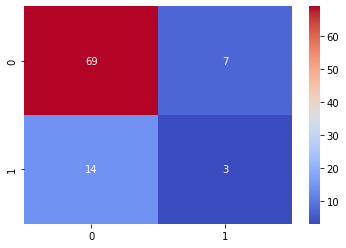

In [458]:

sns.heatmap(cf_matrix, annot=True, cmap = 'coolwarm')
plt.savefig('log_reg_confusion_matrix.png')

The Logistic regression model gives us 7 false positives, 14 false negatives, 69 true negatives and 3 true positives.

### K Nearest Neighbours

Let's take a look at how the K Nearest neighbours model performs with this data,

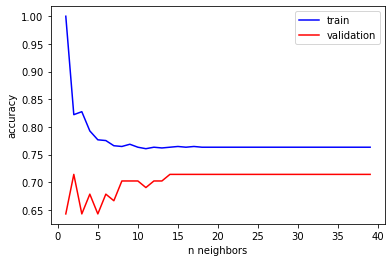

In [459]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 40))
train_scores = []
validation_scores = []

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Evaluate
    train_scores.append(knn.score(X_train, y_train))
    validation_scores.append(knn.score(X_validation, y_validation))
 
    
plt.figure()
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()


# We'll choose 14 based on this plot

In [460]:
final_knn = KNeighborsClassifier(n_neighbors=14)
final_knn.fit(X_remainder, y_remainder)

print('KNN score:', final_knn.score(X_test, y_test))

KNN score: 0.8172043010752689


In [461]:
y_pred = final_knn.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8172043010752689

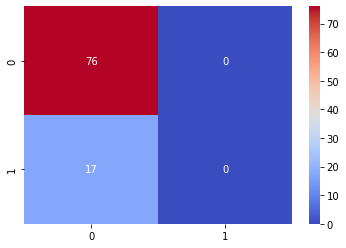

In [462]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap = 'coolwarm')
plt.savefig('knn_confusion_matrix.png')

Based on this confusion matrix, it shows that the KNN model is heavily biased towards predicting that the movie won't be a success based on the script features.

This isn't a very good model given our current data and target variable.

Let us try a decision tree model as well.

### Decision tree model

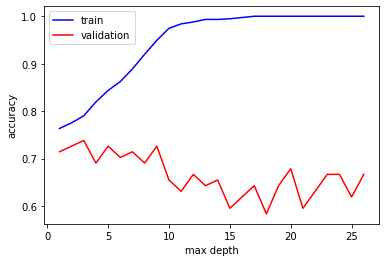

In [463]:
from sklearn.tree import DecisionTreeClassifier

depths = list(range(1, int(np.sqrt(len(X_train)))))
train_scores = []
validation_scores = []

for d in depths:
    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)
    
    # Evaluate
    train_scores.append(dt.score(X_train, y_train))
    validation_scores.append(dt.score(X_validation, y_validation))
    
plt.figure()
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# We'll opt for 3 here

In [464]:
#refit the DT with max_depth = 3
final_dt = DecisionTreeClassifier(max_depth=3)
final_dt.fit(X_remainder, y_remainder)

print("DT score:", final_dt.score(X_test, y_test))

DT score: 0.7956989247311828


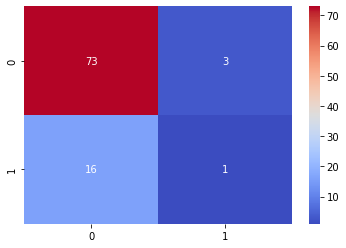

In [465]:
y_pred = final_dt.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap = 'coolwarm')
plt.savefig('decision_tree_confusion_matrix.png')

The Decision tree model with 3 decision trees gives us 3 false positives, 16 false negatives, 73 true negatives and 1 true positive.